In [32]:
import numpy as np
import pandas as pd
import time
import os
import sys
import matplotlib.pyplot as plt

## Utils

In [33]:
def read_file(filename: str):
    with open(filename) as file:
        books_in_library_with_id = []
        nb_books_in_library_with_id = []
        signup_days_for_library_with_id = []
        shipping_speed_for_library_with_id = []
        
        for idx, line in enumerate(file):
            if(idx == 0):
                # Start of the file
                line_1 = line.replace('\n', '').split(' ')
#                 print(line_1)
                nb_books = int(line_1[0])
                nb_libraries = int(line_1[1])
                nb_days = int(line_1[2])

#                 print(nb_books)
#                 print(nb_libraries)
#                 print(nb_days)
            elif(idx == 1):
                book_scores_with_id = line.replace('\n', '').split(' ')
                book_scores_with_id = list(map(int,book_scores_with_id))

            else:

                if(idx % 2 == 0):
                    
                    #### Per library section
                    line_1 = line.replace('\n', '').split(' ')
                    if(line_1[0] == ''):
                        break

                    nb_books_in_library_with_id.append(int(line_1[0]))
                    signup_days_for_library_with_id.append(int(line_1[1]))
                    shipping_speed_for_library_with_id.append(int(line_1[2]))
                    
#                     print(nb_books_in_library_with_id)
#                     print(signup_days_for_library_with_id)
#                     print(shipping_speed_for_library_with_id)
                if(idx % 2 == 1):

                    book_ids = line.replace('\n', '').split(' ')
                    if(book_ids[0] == ''):
                        break

                    book_ids = list(map(int,book_ids))
                    books_in_library_with_id.append(book_ids)
#                     print("book ids : {}".format(books_in_library_with_id))



    return nb_books, \
            nb_libraries, \
            nb_days, \
            nb_books_in_library_with_id, \
            signup_days_for_library_with_id, \
            shipping_speed_for_library_with_id, \
            book_scores_with_id ,\
            books_in_library_with_id

In [71]:
def output(lib_ids, book_ids, filename):
    with open(filename, "w") as file:
        line = str(len(lib_ids)) + "\n"
        file.write(line)
        for lib_id, ids in zip(lib_ids, book_ids):
            line1 = str(lib_id) + " " + str(len(ids)) + "\n"
            file.write(line1)
            line2 = ""
            for id in ids:
                line2 += str(id) + " "
            line2 = line2[:-1] + "\n"
            file.write(line2)

## Naive algorithm

Sort libraries by signup_days_for_library_with_id and return them with a book ordering maximizing the score

In [49]:
file_names = ["data/a_example.txt", "data/b_read_on.txt", 
              "data/c_incunabula.txt", "data/d_tough_choices.txt", 
              "data/e_so_many_books.txt", "data/f_libraries_of_the_world.txt"]

In [50]:
file_name = file_names[2]

In [51]:
nb_books , \
	nb_libraries, \
	nb_days, \
	nb_books_in_library_with_id, \
	signup_days_for_library_with_id, \
	shipping_speed_for_library_with_id, \
	book_scores_with_id ,\
	books_in_library_with_id  = read_file(file_name)

In [52]:
tmp = np.sort(signup_days_for_library_with_id)
indices = np.argsort(signup_days_for_library_with_id)

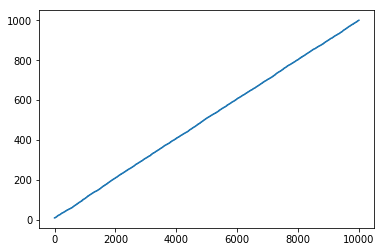

In [53]:
plt.plot(tmp)

In [54]:
cumsum = np.cumsum(tmp).tolist()

In [55]:
nb_days

100000

In [56]:
lib_to_use = []
count = 0

while True:
    
    if(len(cumsum) <= count):
        break
    if(cumsum[count]>nb_days):
        break
        
    lib_to_use.append(indices[count])
    count +=1
    

In [57]:
len(lib_to_use)

1338

In [82]:
def sort_books_per_library(library_list_in_order : list):


    # Books IDs to send first of ALL books
    book_scores_index_sorted = list(reversed(sorted(range(len(book_scores_with_id)), key=book_scores_with_id.__getitem__)))

    book_shipping_sorted_for_library_with_id = []
    for library_id in library_list_in_order.copy():
        books = books_in_library_with_id[library_id]

        shipping_order = []
        for book_id in book_scores_index_sorted:
            if(book_id in books):
                shipping_order.append(book_id)
                book_scores_index_sorted.remove(book_id)
        
        if not (shipping_order == []):
            book_shipping_sorted_for_library_with_id.append(shipping_order)
        else:
            library_list_in_order.remove(library_id)
            print(library_id)

    return book_shipping_sorted_for_library_with_id, library_list_in_order

In [61]:
out = sort_books_per_library(lib_to_use)

In [62]:
output(lib_to_use, out, "subm_f.txt")

In [74]:
file_names = ["data/a_example.txt", "data/b_read_on.txt", 
              "data/c_incunabula.txt", "data/d_tough_choices.txt", 
              "data/e_so_many_books.txt", "data/f_libraries_of_the_world.txt"]

In [80]:
file_name = file_names[3]
print(file_name)
nb_books , \
nb_libraries, \
nb_days, \
nb_books_in_library_with_id, \
signup_days_for_library_with_id, \
shipping_speed_for_library_with_id, \
book_scores_with_id ,\
books_in_library_with_id  = read_file(file_name)

tmp = np.sort(signup_days_for_library_with_id)
indices = np.argsort(signup_days_for_library_with_id)

cumsum = np.cumsum(tmp).tolist()

lib_to_use = []
count = 0

while True:

    if(len(cumsum) <= count):
        break
    if(cumsum[count]>nb_days):
        break

    lib_to_use.append(indices[count])
    count +=1


data/d_tough_choices.txt
20754
16306
15328
17892
17818
18418
16961
17032
17470
27646
27634
27226
27924
27706
26594
26704
26690
26633
26328
26300
26442
26384
26416
27159
27128
27124
26832
26867
29374
29402
29316
29342
29490
29438
29441
29470
29086
29188
29207
29838
29824
29797
29969
29978
29974
29911
29568
29754
29744
29698
29694
28382
28526
28206
28148
28334
28915
28926
28866
28945
28992
28978
28608
28600
28794
28728
28762
22500
23712
23708
23791
23652
23646
23572
23586
24224
24250
24150
24188
24174
24142
24336
24258
23980
24104
24138
24046
22818
22758
22776
22768
22930
22924
22958
22864
22898
22602
22514
22536
22694
22708
22719
22642
22626
22652
23316
23224
23210
23206
23235
23424
23380
23334
23364
23034
23082
23076
23060
23016
23087
23148
23178
23104
23132
23118
23129
25640
25635
25570
25577
25592
25732
25728
25684
25712
25704
25707
25386
25408
25330
25343
25364
25350
25508
25544
25524
25488
25436
25474
26096
26126
26110
26036
26064
26054
26208
26244
26240
26228
26224
26152
26140
261

In [81]:
print(books_in_library_with_id[20753])

[72063, 58196, 36179, 72064, 32371, 71008, 23097, 64826, 14525, 30948]


In [83]:
out, lib_to_use = sort_books_per_library(lib_to_use)
output(lib_to_use, out, sub_names[3])

29413
29468
29752
24136
22816
22926
22956
22896
22556
23314
23170
25606
25682
25362
26124
26062
26206
26138
26014
25899
25966
24672
24826
24742
24418
24556
24540
25167
25112
25284
24878
25014


In [75]:
sub_names = ['a.txt', 'b.txt', 'c.txt', 'd.txt', 'e.txt', 'f.txt']

_id_ = 0
for file_name in file_names:
    print(file_name)
    nb_books , \
	nb_libraries, \
	nb_days, \
	nb_books_in_library_with_id, \
	signup_days_for_library_with_id, \
	shipping_speed_for_library_with_id, \
	book_scores_with_id ,\
	books_in_library_with_id  = read_file(file_name)
    
    tmp = np.sort(signup_days_for_library_with_id)
    indices = np.argsort(signup_days_for_library_with_id)
    
    cumsum = np.cumsum(tmp).tolist()
    
    lib_to_use = []
    count = 0

    while True:

        if(len(cumsum) <= count):
            break
        if(cumsum[count]>nb_days):
            break

        lib_to_use.append(indices[count])
        count +=1
        
    out, lib_to_use = sort_books_per_library(lib_to_use)
    output(lib_to_use, out, sub_names[_id_])
    _id_+=1
    

data/a_example.txt
data/b_read_on.txt
data/c_incunabula.txt
data/d_tough_choices.txt
data/e_so_many_books.txt
data/f_libraries_of_the_world.txt
